In [ ]:
import numpy as np
from google.colab import drive

drive.mount('/content/drive')
salinas_image = np.load('/content/drive/My Drive/Machine Learning/salinas_image.npy')
salinas_labels = np.load('/content/drive/My Drive/Machine Learning/salinas_labels.npy')

# Έλεγχος διαστάσεων
print("Διαστάσεις της εικόνας:", salinas_image.shape)
print("Διαστάσεις των επισημειώσεων:", salinas_labels.shape)


Mounted at /content/drive
Διαστάσεις της εικόνας: (512, 217, 204)
Διαστάσεις των επισημειώσεων: (512, 217)


In [ ]:
height, width, num_channels = salinas_image.shape

print("Ύψος της εικόνας:", height)
print("Πλάτος της εικόνας:", width)
print("Αριθμός υπερφασματικών καναλιών:", num_channels)


Ύψος της εικόνας: 512
Πλάτος της εικόνας: 217
Αριθμός υπερφασματικών καναλιών: 204


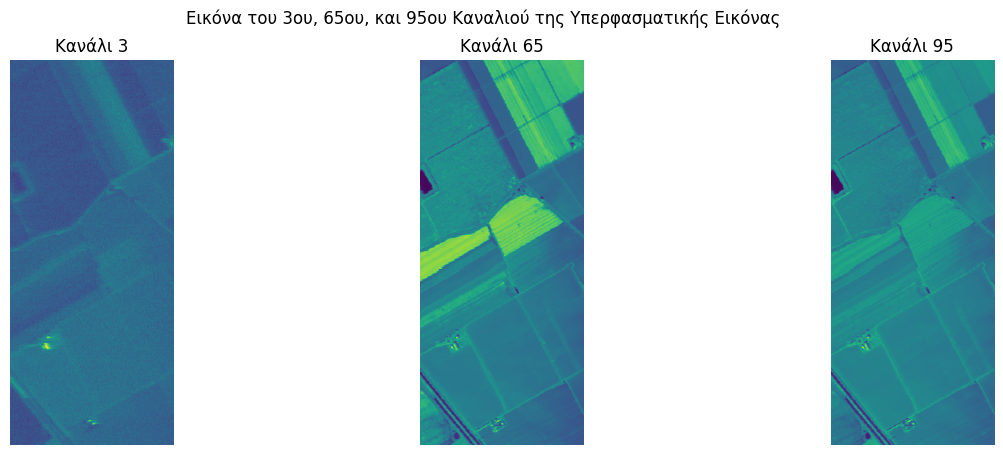

In [ ]:
import matplotlib.pyplot as plt

channels_to_plot = [2, 64, 94]

plt.figure(figsize=(15, 5))

for i, channel in enumerate(channels_to_plot):
    plt.subplot(1, 3, i + 1)
    plt.imshow(salinas_image[:, :, channel], cmap='viridis')
    plt.title(f'Κανάλι {channel + 1}')
    plt.axis('off')

plt.suptitle('Εικόνα του 3ου, 65ου, και 95ου Καναλιού της Υπερφασματικής Εικόνας')
plt.show()


In [ ]:
unique_classes = np.unique(salinas_labels)
num_classes = len(unique_classes)

print("Αριθμός διαφορετικών κατηγοριών καλλιέργειας:", num_classes)


Αριθμός διαφορετικών κατηγοριών καλλιέργειας: 17


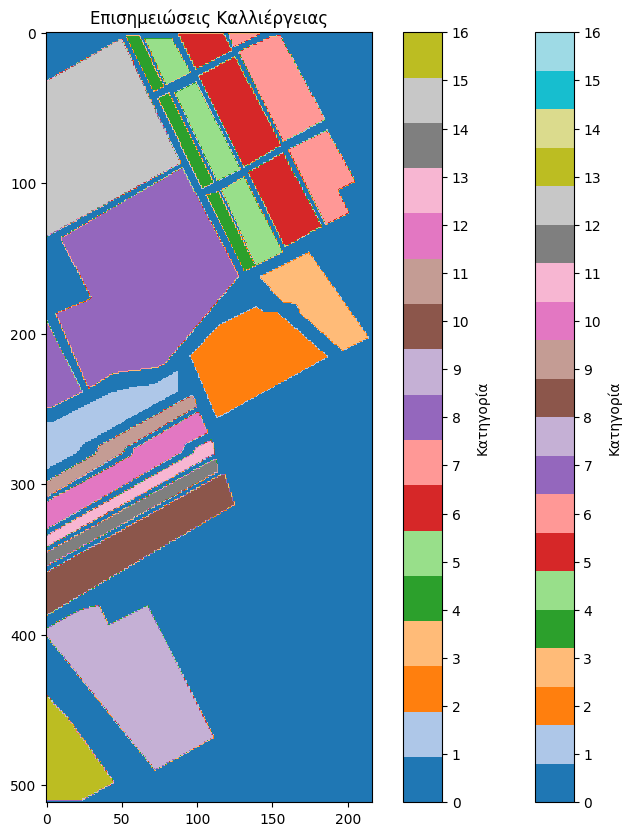

In [ ]:
classes = [
    "Background",
    "Broccoli_green_weeds_1",
    "Broccoli_green_weeds_2",
    "Fallow",
    "Fallow_rough_plow",
    "Fallow_smooth",
    "Stubble",
    "Celery",
    "Grapes_untrained",
    "Soil_vineyard_develop",
    "Corn_senesced_green_weeds",
    "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk",
    "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk",
    "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]
plt.figure(figsize=(10, 10))
plt.imshow(salinas_labels, cmap='tab20')
plt.title('Επισημειώσεις Καλλιέργειας')
plt.colorbar(ticks=np.arange(len(classes)), label='Κατηγορία')

from matplotlib.colors import ListedColormap

cmap = ListedColormap(plt.cm.tab20.colors[:len(unique_classes)])
bounds = np.arange(len(classes) + 1)
plt.imshow(salinas_labels, cmap=cmap)
plt.colorbar(ticks=unique_classes, label='Κατηγορία')

plt.show()


In [ ]:
import numpy as np

pixel_counts = np.bincount(salinas_labels.flatten())

for i, count in enumerate(pixel_counts):
    print(f'Κατηγορία {i}: {count} pixels')


Κατηγορία 0: 56975 pixels
Κατηγορία 1: 2009 pixels
Κατηγορία 2: 3726 pixels
Κατηγορία 3: 1976 pixels
Κατηγορία 4: 1394 pixels
Κατηγορία 5: 2678 pixels
Κατηγορία 6: 3959 pixels
Κατηγορία 7: 3579 pixels
Κατηγορία 8: 11271 pixels
Κατηγορία 9: 6203 pixels
Κατηγορία 10: 3278 pixels
Κατηγορία 11: 1068 pixels
Κατηγορία 12: 1927 pixels
Κατηγορία 13: 916 pixels
Κατηγορία 14: 1070 pixels
Κατηγορία 15: 7268 pixels
Κατηγορία 16: 1807 pixels


In [ ]:
import numpy as np

# Μετατροπή της εικόνας (N x K)
# Από σχήμα (height, width, channels) σε (N, K), όπου N = height * width και K = channels
height, width, num_channels = salinas_image.shape
N = height * width
K = num_channels

reshaped_image = salinas_image.reshape(N, K)

print("Νέο σχήμα της εικόνας:", reshaped_image.shape)

reshaped_labels = salinas_labels.reshape(N)

print("Νέο σχήμα των επισημειώσεων:", reshaped_labels.shape)


Νέο σχήμα της εικόνας: (111104, 204)
Νέο σχήμα των επισημειώσεων: (111104,)


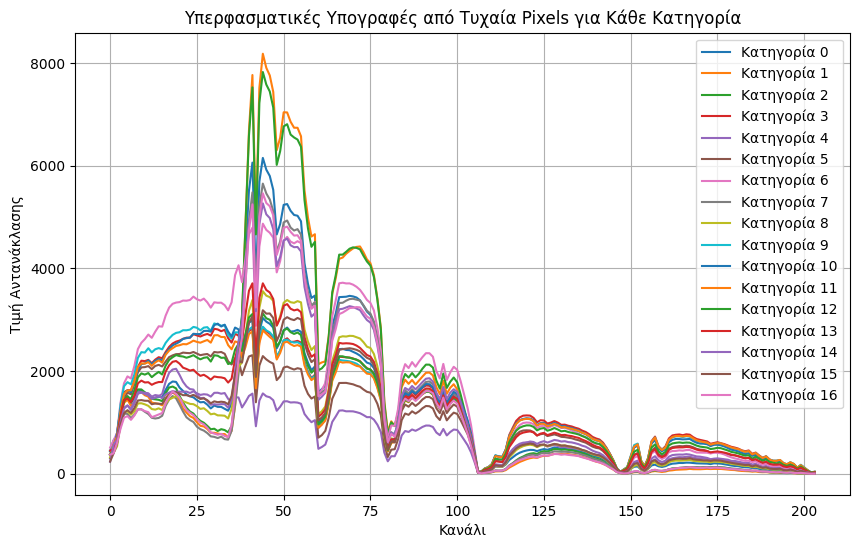

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

unique_classes = np.unique(reshaped_labels)

spectral_signatures = []

# Για κάθε κατηγορία, επιλέγουμε ένα τυχαίο pixel
for class_label in unique_classes:
    indices = np.where(reshaped_labels == class_label)[0]
    random_index = np.random.choice(indices)
    spectral_signature = reshaped_image[random_index]
    spectral_signatures.append((class_label, spectral_signature))

plt.figure(figsize=(10, 6))

for class_label, signature in spectral_signatures:
    plt.plot(signature, label=f'Κατηγορία {class_label}')

plt.xlabel('Κανάλι')
plt.ylabel('Τιμή Αντανάκλασης')
plt.title('Υπερφασματικές Υπογραφές από Τυχαία Pixels για Κάθε Κατηγορία')
plt.legend()
plt.grid(True)
plt.show()


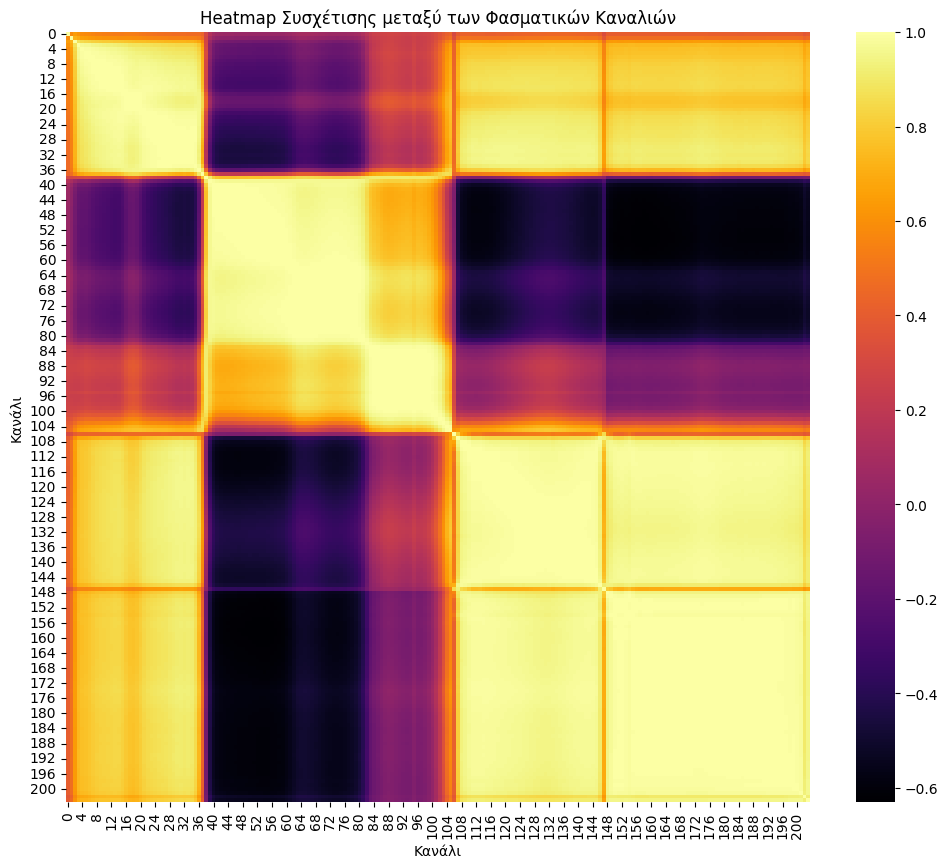

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = np.corrcoef(reshaped_image, rowvar=False)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='inferno', annot=False, cbar=True)
plt.title('Heatmap Συσχέτισης μεταξύ των Φασματικών Καναλιών')
plt.xlabel('Κανάλι')
plt.ylabel('Κανάλι')
plt.show()


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

n_clusters = 17
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

predicted_labels = kmeans.fit_predict(reshaped_image)

In [ ]:

ari_score = adjusted_rand_score(reshaped_labels, predicted_labels)
print(f'Adjusted Rand Index (ARI): {ari_score:.4f}')

silhouette_avg = silhouette_score(reshaped_image, predicted_labels, metric='euclidean')
print(f'Silhouette Score: {silhouette_avg:.4f}')


Adjusted Rand Index (ARI): 0.1465
Silhouette Score: 0.4125


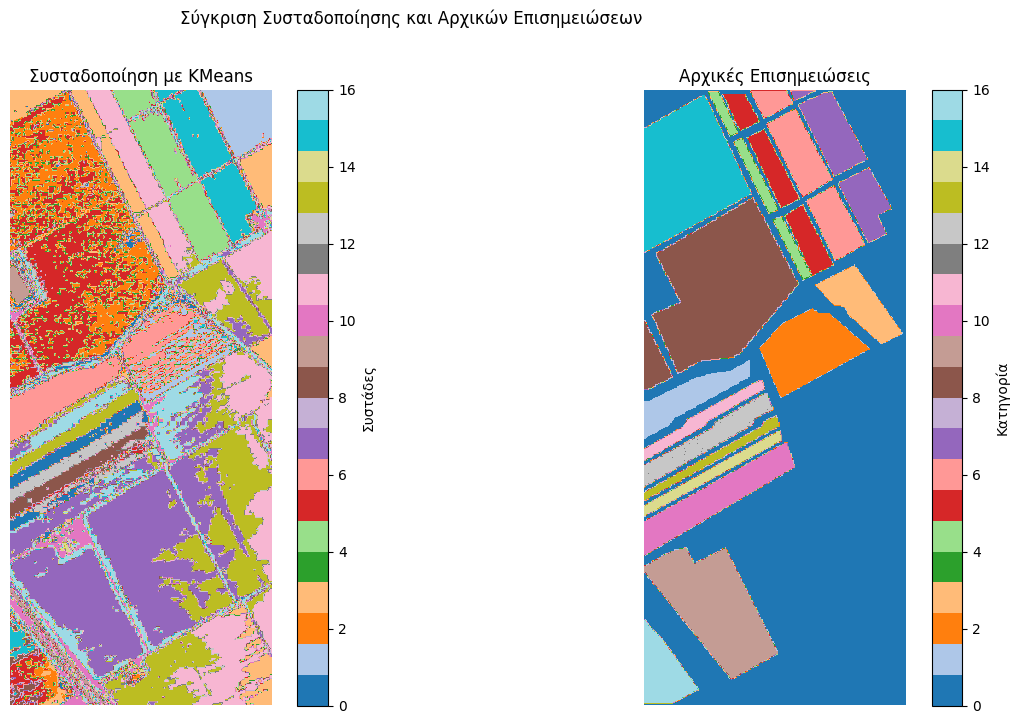

In [ ]:
import matplotlib.pyplot as plt

clustered_image = predicted_labels.reshape(height, width)

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.imshow(clustered_image, cmap='tab20')
plt.title('Συσταδοποίηση με KMeans')
plt.colorbar(label='Συστάδες')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(salinas_labels, cmap='tab20')
plt.title('Αρχικές Επισημειώσεις')
plt.colorbar(label='Κατηγορία')
plt.axis('off')

plt.suptitle('Σύγκριση Συσταδοποίησης και Αρχικών Επισημειώσεων')
plt.show()


In [ ]:
!pip install fuzzy-c-means


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.15.1
    Uninstalling typer-0.15.1:
      Successfully uninstalled typer-0.15.1
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.27.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.


Adjusted Rand Index (ARI) για Fuzzy C-Means: 0.1353
Silhouette Score για Fuzzy C-Means: 0.3572


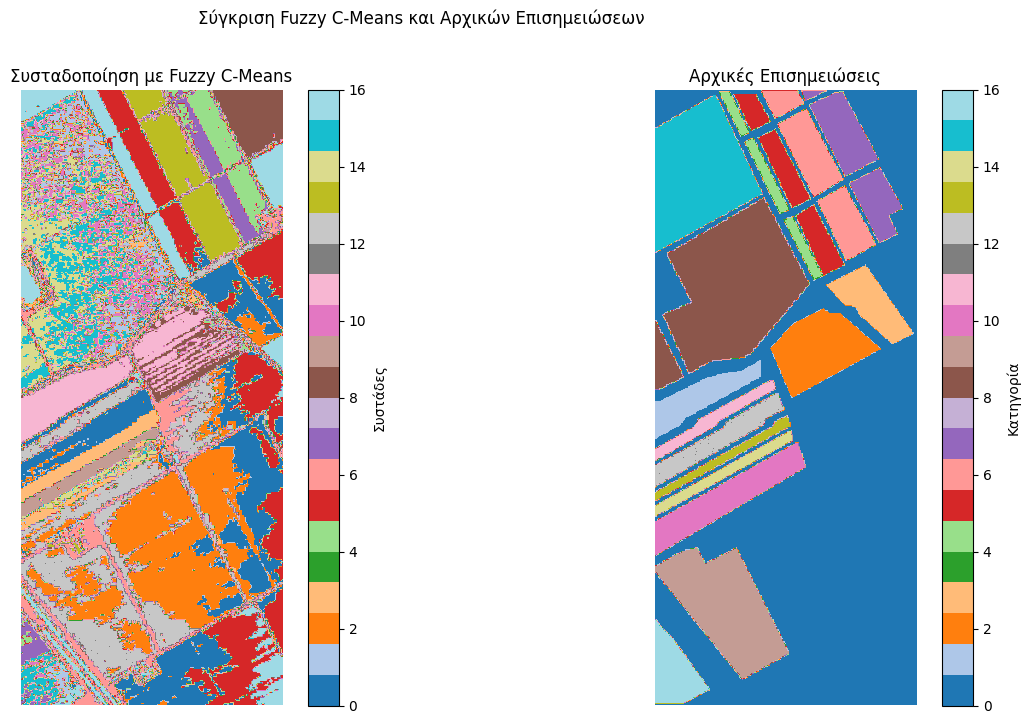

In [ ]:

import numpy as np
from fcmeans import FCM
from sklearn.metrics import adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt

n_clusters = 17
fcm = FCM(n_clusters=n_clusters, random_state=42)

fcm.fit(reshaped_image)

fuzzy_labels = fcm.predict(reshaped_image)

ari_score_fcm = adjusted_rand_score(reshaped_labels, fuzzy_labels)
print(f'Adjusted Rand Index (ARI) για Fuzzy C-Means: {ari_score_fcm:.4f}')

silhouette_avg_fcm = silhouette_score(reshaped_image, fuzzy_labels, metric='euclidean')
print(f'Silhouette Score για Fuzzy C-Means: {silhouette_avg_fcm:.4f}')

fuzzy_clustered_image = fuzzy_labels.reshape(height, width)

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.imshow(fuzzy_clustered_image, cmap='tab20')
plt.title('Συσταδοποίηση με Fuzzy C-Means')
plt.colorbar(label='Συστάδες')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(salinas_labels, cmap='tab20')
plt.title('Αρχικές Επισημειώσεις')
plt.colorbar(label='Κατηγορία')
plt.axis('off')

plt.suptitle('Σύγκριση Fuzzy C-Means και Αρχικών Επισημειώσεων')
plt.show()


Σχήμα των δεδομένων μετά το PCA: (111104, 3)


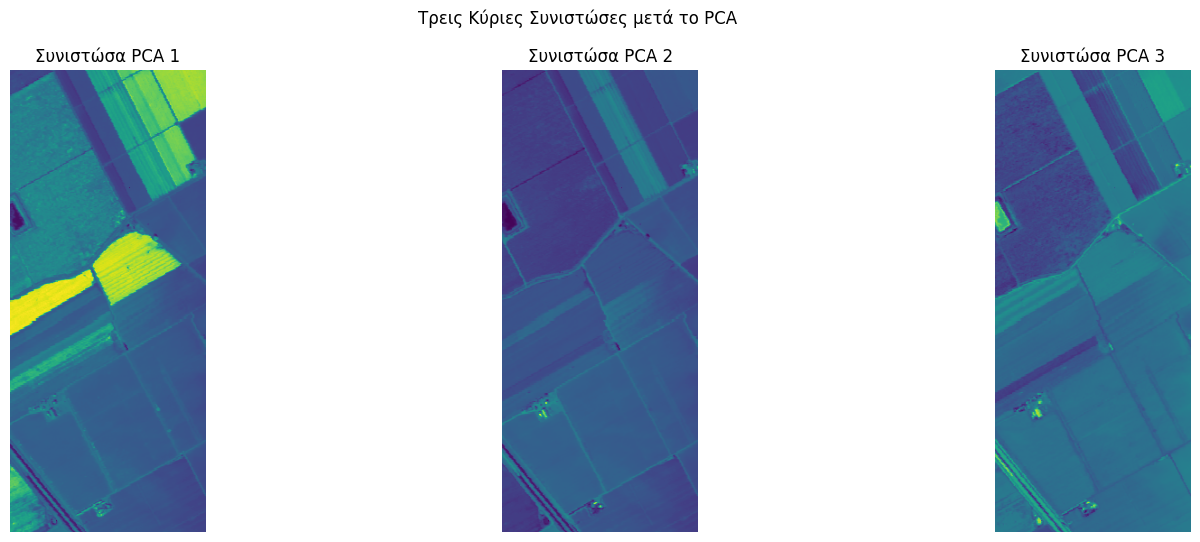

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

n_components = 3
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(reshaped_image)

print("Σχήμα των δεδομένων μετά το PCA:", pca_result.shape)

pca_image = pca_result.reshape(height, width, n_components)

# Σχεδίαση των τριών κύριων συνιστωσών ως εικόνες
plt.figure(figsize=(18, 6))

for i in range(n_components):
    plt.subplot(1, 3, i + 1)
    plt.imshow(pca_image[:, :, i], cmap='viridis')
    plt.title(f'Συνιστώσα PCA {i + 1}')
    plt.axis('off')

plt.suptitle('Τρεις Κύριες Συνιστώσες μετά το PCA')
plt.show()


In [ ]:
# Υπολογισμός της συνολικής διακύμανσης που διατηρείται με τις τρεις συνιστώσες
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance = np.sum(explained_variance_ratio)
print(f"Ποσοστό διακύμανσης που διατηρείται με n_components=3: {total_explained_variance:.4f} ή {total_explained_variance * 100:.2f}%")


Ποσοστό διακύμανσης που διατηρείται με n_components=3: 0.9914 ή 99.14%


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

kmeans_pca = KMeans(n_clusters=17, random_state=42)
predicted_labels_pca = kmeans_pca.fit_predict(pca_result)

ari_score_pca = adjusted_rand_score(reshaped_labels, predicted_labels_pca)
print(f'Adjusted Rand Index (ARI) για KMeans μετά το PCA: {ari_score_pca:.4f}')

silhouette_avg_pca = silhouette_score(pca_result, predicted_labels_pca, metric='euclidean')
print(f'Silhouette Score για KMeans μετά το PCA: {silhouette_avg_pca:.4f}')


Adjusted Rand Index (ARI) για KMeans μετά το PCA: 0.1473
Silhouette Score για KMeans μετά το PCA: 0.4347


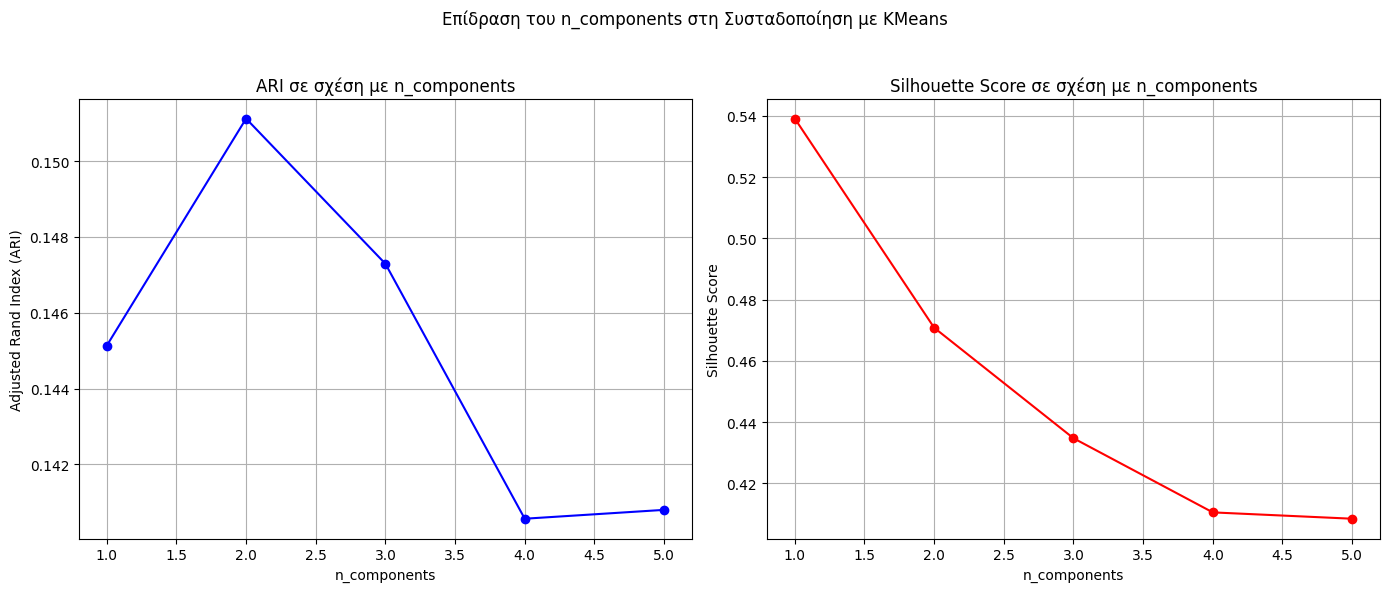

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt

ari_scores = []
silhouette_scores = []

for n_components in range(1, 6):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(reshaped_image)

    kmeans_pca = KMeans(n_clusters=17, random_state=42)
    predicted_labels_pca = kmeans_pca.fit_predict(pca_result)

    ari_score_pca = adjusted_rand_score(reshaped_labels, predicted_labels_pca)
    ari_scores.append(ari_score_pca)

    silhouette_avg_pca = silhouette_score(pca_result, predicted_labels_pca, metric='euclidean')
    silhouette_scores.append(silhouette_avg_pca)

n_components_values = range(1, 6)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_components_values, ari_scores, marker='o', linestyle='-', color='b')
plt.xlabel('n_components')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.title('ARI σε σχέση με n_components')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_components_values, silhouette_scores, marker='o', linestyle='-', color='r')
plt.xlabel('n_components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score σε σχέση με n_components')
plt.grid(True)

plt.suptitle('Επίδραση του n_components στη Συσταδοποίηση με KMeans')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
!wget https://madm.dfki.de/files/sentinel/EuroSAT.zip --no-check-certificate
! unzip EuroSAT.zip

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

data_dir = os.path.join('2750')
print(f'Τα δεδομένα βρίσκονται στο: {data_dir}')

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.90
)

dataset = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    subset='training'
)

print(f'Φορτώθηκαν {len(dataset) * dataset.batch_size} εικόνες.')


Streaming output truncated to the last 5000 lines.
  inflating: 2750/SeaLake/SeaLake_967.jpg  
  inflating: 2750/SeaLake/SeaLake_515.jpg  
  inflating: 2750/SeaLake/SeaLake_1465.jpg  
  inflating: 2750/SeaLake/SeaLake_1817.jpg  
  inflating: 2750/SeaLake/SeaLake_2902.jpg  
  inflating: 2750/SeaLake/SeaLake_2570.jpg  
  inflating: 2750/SeaLake/SeaLake_1004.jpg  
  inflating: 2750/SeaLake/SeaLake_174.jpg  
  inflating: 2750/SeaLake/SeaLake_2111.jpg  
  inflating: 2750/SeaLake/SeaLake_2388.jpg  
  inflating: 2750/SeaLake/SeaLake_1948.jpg  
  inflating: 2750/SeaLake/SeaLake_838.jpg  
  inflating: 2750/SeaLake/SeaLake_2738.jpg  
  inflating: 2750/SeaLake/SeaLake_1999.jpg  
  inflating: 2750/SeaLake/SeaLake_2359.jpg  
  inflating: 2750/SeaLake/SeaLake_2660.jpg  
  inflating: 2750/SeaLake/SeaLake_1775.jpg  
  inflating: 2750/SeaLake/SeaLake_605.jpg  
  inflating: 2750/SeaLake/SeaLake_2201.jpg  
  inflating: 2750/SeaLake/SeaLake_264.jpg  
  inflating: 2750/SeaLake/SeaLake_1314.jpg  
  inflatin

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

feature_extractor = MobileNetV3Small(
    weights='imagenet',
    include_top=False,
    pooling='avg',
    input_shape=(224, 224, 3)
)


4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
features = feature_extractor.predict(dataset, verbose=1)

print(f"Extracted features shape: {features.shape}")


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2700/2700 ━━━━━━━━━━━━━━━━━━━━ 57s 20ms/step
Extracted features shape: (2700, 576)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Εφαρμογή του KMeans στα εξαγόμενα χαρακτηριστικά
n_clusters = 10  # Υπάρχουν 10 κατηγορίες στο EuroSAT dataset
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
predicted_labels = kmeans.fit_predict(features)

# Χρήση των πραγματικών ετικετών από το ImageDataGenerator για την αξιολόγηση
true_labels = dataset.classes




In [ ]:
# Υπολογισμός του Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(true_labels, predicted_labels)
print(f'Adjusted Rand Index (ARI) για τα εξαγόμενα χαρακτηριστικά: {ari_score:.4f}')

Adjusted Rand Index (ARI) για τα εξαγόμενα χαρακτηριστικά: 0.5014


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Δημιουργία λίστας για αποθήκευση των pixel τιμών όλων των εικόνων
pixel_features_list = []

# Για κάθε εικόνα ή batch εικόνων στον generator, αναδιαμορφώνουμε τα pixel
for batch_images, _ in dataset:
    # Batch εικόνων με διαστάσεις (batch_size, height, width, channels)
    # Κανονικοποίηση των pixel στο εύρος [0, 1] (ήδη έγινε με το datagen μέσω rescale)
    for image in batch_images:
        # Αναδιαμόρφωση κάθε εικόνας σε μονοδιάστατο διάνυσμα (flattening)
        flattened_image = image.flatten()
        pixel_features_list.append(flattened_image)

    # Έξοδος εάν έχουμε επεξεργαστεί όλες τις εικόνες του dataset
    if len(pixel_features_list) >= dataset.samples:
        break

# Μετατροπή της λίστας pixel χαρακτηριστικών σε έναν πίνακα NumPy για περαιτέρω χρήση
pixel_features = np.array(pixel_features_list)
print(f"Διαστάσεις των χαρακτηριστικών pixel: {pixel_features.shape}")

# Εφαρμογή του KMeans στα pixel χαρακτηριστικά
n_clusters = 10  # Υπάρχουν 10 κατηγορίες στο EuroSAT dataset
kmeans_pixel = KMeans(n_clusters=n_clusters, random_state=42)
predicted_labels_pixel = kmeans_pixel.fit_predict(pixel_features)



Διαστάσεις των χαρακτηριστικών pixel: (2700, 150528)


In [ ]:
# Υπολογισμός του Adjusted Rand Index (ARI)
true_labels = dataset.classes
ari_score_pixel = adjusted_rand_score(true_labels, predicted_labels_pixel)
print(f'Adjusted Rand Index (ARI) για συσταδοποίηση με χρήση των τιμών των pixel: {ari_score_pixel:.4f}')


Adjusted Rand Index (ARI) για συσταδοποίηση με χρήση των τιμών των pixel: 0.1512


In [ ]:
def plot_grid_for_clusters(features, labels, dataset, title, num_images=5):
    """
    Visualize a grid of images for each cluster.

    Args:
        features (array): Image features (CNN or pixel-based).
        labels (array): Cluster labels from KMeans.
        dataset: Original dataset object for retrieving images.
        title (str): Title for the plot.
        num_images (int): Number of random images to display per cluster.
    """
    num_clusters = len(set(labels))
    plt.figure(figsize=(20, num_clusters * 4))

    for cluster in range(num_clusters):
        # Find indices for the current cluster
        cluster_indices = [i for i, lbl in enumerate(labels) if lbl == cluster]

        # Select random indices (up to num_images)
        selected_indices = np.random.choice(cluster_indices, size=min(len(cluster_indices), num_images), replace=False)

        for idx, selected_index in enumerate(selected_indices):
            image, _ = dataset[selected_index]  # Load image

            # Undo preprocessing normalization for visualization
            image = (image + 1) / 2.0  # Convert from [-1, 1] to [0, 1]
            if image.shape[0] == 1:  # Remove batch dimension if exists
                image = np.squeeze(image, axis=0)
            image = (image - image.min()) / (image.max() - image.min())  # Normalize to [0, 1]

            # Plot the image
            plt.subplot(num_clusters, num_images, cluster * num_images + idx + 1)
            plt.imshow(image)
            plt.title(f"Cluster {cluster}")
            plt.axis("off")

    plt.suptitle(title, fontsize=16)
    plt.show()



In [ ]:
plot_grid_for_clusters(
    features=features,
    labels=predicted_labels,
    dataset=dataset,
    title="Cluster Examples (CNN Features)"
)

plot_grid_for_clusters(
    features=pixel_features,
    labels=predicted_labels_pixel,
    dataset=dataset,
    title="Cluster Examples (Pixel Features)"
)

Output hidden; open in https://colab.research.google.com to view.